## 라이브러리, 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [2]:
df_train = pd.read_csv('C:\\Users\\User\\Desktop\\팀플\\train.csv')
df_test = pd.read_csv('C:\\Users\\User\\Desktop\\팀플\\train.csv                                                                                                                             ')
df_train.head()
df_test.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10660\3971190630.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('C:\\Users\\User\\Desktop\\팀플\\train.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_10660\3971190630.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('C:\\Users\\User\\Desktop\\팀플\\train.csv                                                                                                                             ')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
# Check Data Size
print('Train Data Size : ',df_train.shape)
print('Test Data Size : ',df_test.shape)

Train Data Size :  (100000, 28)
Test Data Size :  (100000, 28)


In [4]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
# Check Train dataset
# 데이터 세트에 누락된 값이 있습니다.
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# 숫자 데이터 유형이 있는 필드의 통계 값 확인
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# 숫자 데이터 유형 이외의 필드에 대한 통계 값 확인
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## 함수정리

#### 컬럼 정보

In [8]:
# 컬럼에 대한 널값,숫자 유니크, 분포
def get_column_details(df,column):
    print("Details of",column,"column")

    # 데이터 타입
    print("\nDataType: ",df[column].dtype)

    # 널 값 존재하는지 확인 여부
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    # 고유값 개수 확인
    print("\nNumber of Unique Values: ",df[column].nunique())

    # 컬럼 분포 확인
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

### 범주형 변수 clean
### garbage_value = replace_value

In [9]:
def clean_categorical_field(df, column, replace_value=None):

    # gabage => nan 값 처리 해주기.
    if replace_value!=None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    return df

### no

In [10]:
def replace_nm_no(df, column):
  # replace NM => No
  df[column] = df[column].replace('NM', 'No')

  return df

### nan 채우는 함수

#### 그룹별 최빈값 함수
#### occupation, payment behavior

In [11]:
# na 값 그룹의 최빈값으로 채우기 => occupation, payment behavior
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

    return df

#### 그룹별 중앙값
#### Monthly Inhand Salary(왜도설명)
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [12]:
# na 값 그룹의 중앙값으로 채우기
def fill_missing_with_group_median(df, groupby, column):
    print("\nNo. of missing values before filling with group median:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    median_per_group = df.groupby(groupby)[column].transform(lambda x: x.median())
    df[column] = df[column].fillna(median_per_group)

    print("\nNo. of missing values after filling with group median:",df[column].isnull().sum())

    return df

#### 그룹별 평균
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [13]:
# na 값 그룹의 평균으로 채우기
def fill_missing_with_group_mean(df, groupby, column):
    print("\nNo. of missing values before filling with group mean:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    mean_per_group = df.groupby(groupby)[column].transform(lambda x: x.mean())
    df[column] = df[column].fillna(mean_per_group)

    print("\nNo. of missing values after filling with group mean:",df[column].isnull().sum())

    return df

### 그래프 그리기

#### _stacked_bar

In [14]:
# column1 = 현재 열, column2 = 비교열
def plot_stacked_bar(df,column1,column2, rotation=0):

    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    # bar 그려주기
    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### countplot

In [15]:
def plot_countplot(df, column, rotation=0):

    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### discount plot

In [16]:
def plot_displot(df, column, rotation=0, bins=20):
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

### 숫자형 변수 clean

In [17]:
def clean_numerical_field(df, column, strip=None, datatype=None, replace_value=None):

    # garbage => nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # 숫자 옆 특수문자 지우기
    # 각 요소에서 지정된 문자의 선행 및 후행 항목을 제거 => strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\n{strip} are removed")

    # 데이터 타입 변경
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    return df


### iqr

#### iqr_drop =  outlier_iqr_drop

In [18]:
def outlier_iqr_drop(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df_iqr[column] = df_iqr[column].fillna(mode_by_group)
    print(mode_by_group)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    print('q25' , q25, 'q75', q75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)

    df[column] = df[column].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)
    print(df[column].value_counts(dropna=False))

    # drop
    df.dropna(subset=[column], inplace=True)
    print(df[column].value_counts(dropna=False))

    return df

#### iqr 대체 = outlier_iqr_fill

In [19]:
def outlier_iqr_fill(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df_iqr[column] = df_iqr[column].fillna(mode_by_group)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    df_iqr[column] = df_iqr[column].apply(lambda x: upper if (x > upper) else x)
    df_iqr[column] = df_iqr[column].apply(lambda x: lower if (x < lower) else x)

    return df_iqr

### 음수값 처리 함수

In [20]:
def remove_negatives(df, column):

    #if df[column].dtypes == object:
        # 숫자형으로 바꾸기 + 언더바 없애기(_)
     #   df[column] = pd.to_numeric(df[column].str.replace('_', ''))

    # negative값의 개수
    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(Before)")

    # 음수값 제거 -> 0보다 큰 값만 사용
    df = df[df[column] >= 0]

    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(After)")

    return df

### month_Converter

In [21]:
def Month_Converter(df, column):

    def Sub_Month_Converter(val):
        if pd.notnull(val):
            years = int(val.split(' ')[0])
            month = int(val.split(' ')[3])
            return (years*12)+month
        else:
            return val

    df[column] = df[column].apply(lambda x: Sub_Month_Converter(x)).astype(float)

    return df

In [22]:
## 복사본
df_clean = df_train.copy()

## Categorical Variables

### credit score
#### 표준 - 53% 나쁨 - 29% 좋음 - 17%

#### 신용 점수에는 null 값이 없습니다

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Credit_Score Distribution


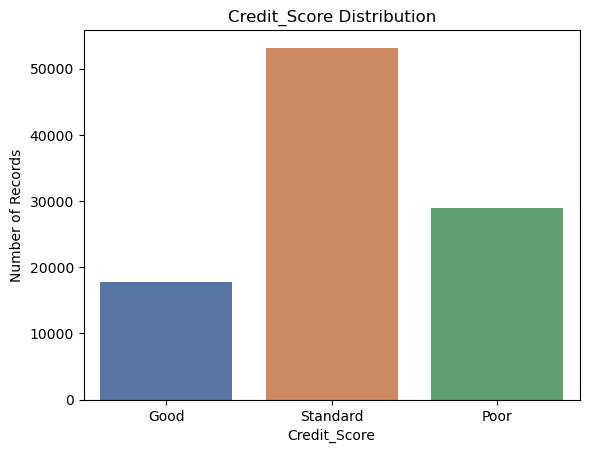

In [23]:
column_name = 'Credit_Score'

# 칼럼 정보
get_column_details(df_clean,column_name)

# 빈도그래프
plot_countplot(df_clean, column_name)

### customer_id

In [24]:
get_column_details(df_clean,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


In [25]:
# 동일한 고객이 다른 신용 점수를 가질 수 있는지 확인
df_clean.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

### month

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

Month & Credit_Score Distribution


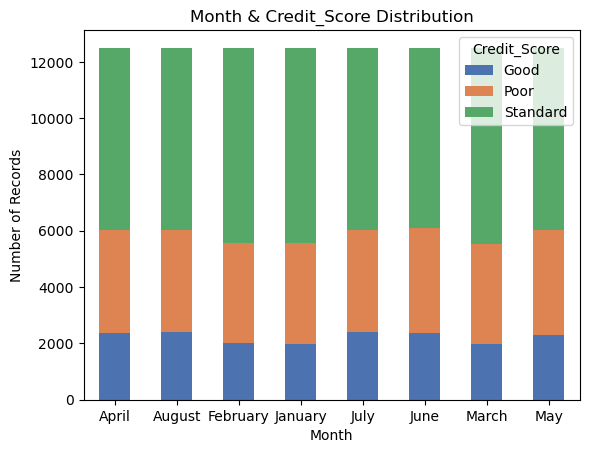

In [26]:
column_name = 'Month'

# 칼럼 정보
get_column_details(df_clean,column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score')

In [27]:
# 월을 datetime 객체로 변환(1~8) , 데이터 타입 변환
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month
df_clean['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

In [28]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### name - 실행 x
#### 9985개의 null 값이 있습니다.
#### 정리 단계 - 각 Customer_ID에 동일한 이름 값 할당
# 제거해주기

In [29]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_categorical_field(df_clean,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64

Garbage value Name is replaced with np.nan


### ssn - 실행 x
### 값을 np.nan으로 교체

#### 각 고객 ID에 동일한 SSN 값 할당

## 제거해주기

In [30]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_categorical_field(df_clean,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

Garbage value #F%$D@*&8 is replaced with np.nan


### occupation
### garbage_value = '_______' => nan
### nan => 그룹화 최빈값

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

Occupation & Credit_Score Distribution


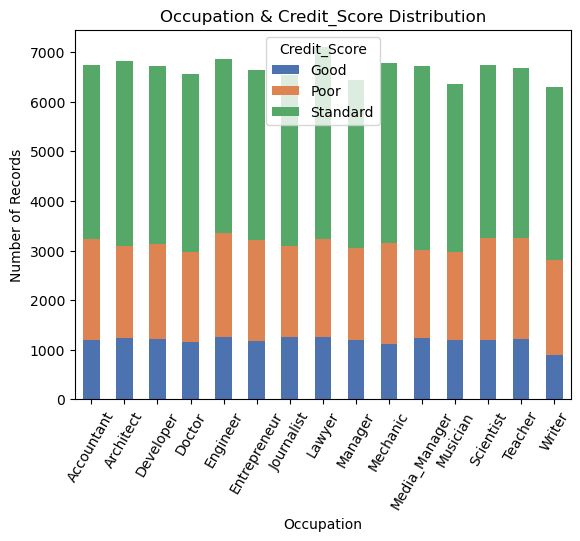

In [31]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'

get_column_details(df_clean,column_name)

# garbage_value => nan 처리 해줌
df_clean = clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

In [32]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### type of loan => 보류
#### not specified => nan 처리

In [33]:
#Get Details of Type of Loan column
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loa

### credit mix
### 전처리 x

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Credit_Mix & Credit_Score Distribution


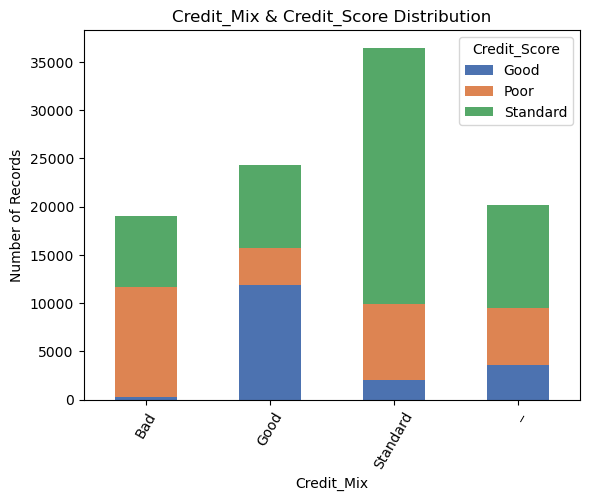

In [34]:
column_name = 'Credit_Mix'

# Get Details
get_column_details(df_clean,column_name)

# Plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment of Min Amount
### NM


Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Payment_of_Min_Amount & Credit_Score Distribution


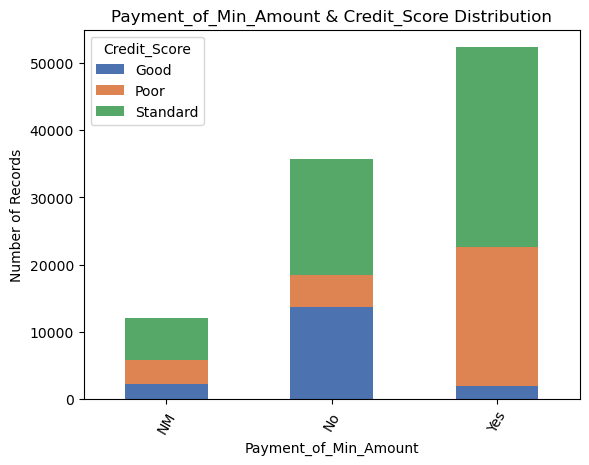

In [35]:
column_name = 'Payment_of_Min_Amount'

# Get Details
get_column_details(df_clean,column_name)

# Plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment Behaviour
### garbage => nan
### customer_id 최빈값


Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600

No. of missing values after filling with group mode: 0

Payment_Behaviour & Credit_Score Distribution


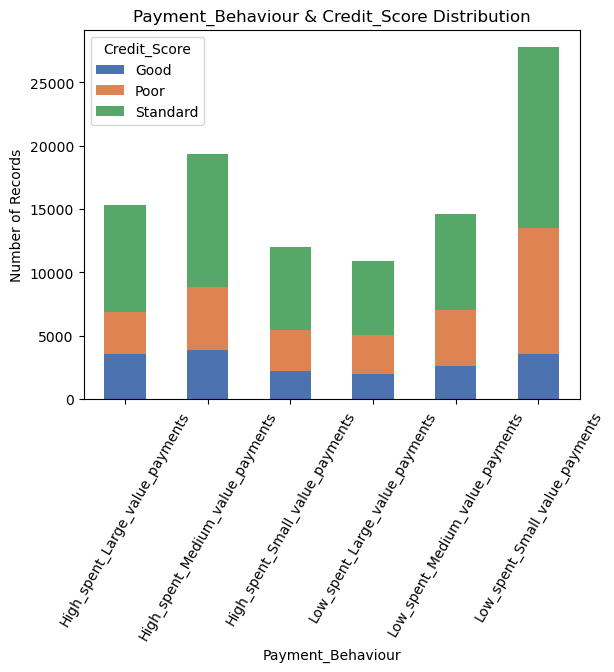

In [36]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

## Numerical Variables
### 후행 및 선행 특수 문자를 제거합니다.
### 필요한 경우 데이터 유형을 객체에서 int/float로 변환합니다.
### Customer_ID로 그룹화할 때 null 값 및 이상값을 모드 값으로 대체

### age
### 1) _ 제거
### 2) iqr
### 3) 음수 확인

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

_ are removed

Datatype of Age is changed to <class 'int'>

Age Distribution


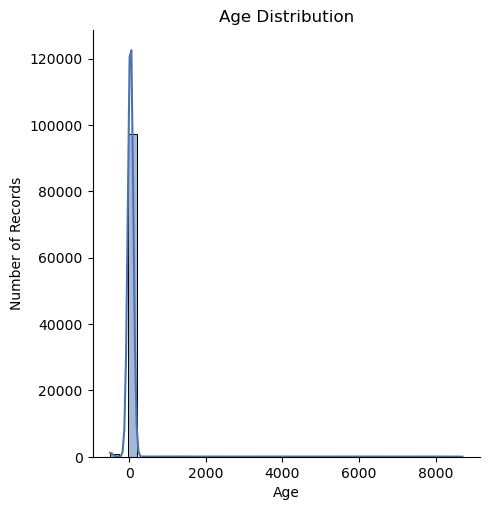


-----------------------------------------------------

There are  886  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Age Distribution


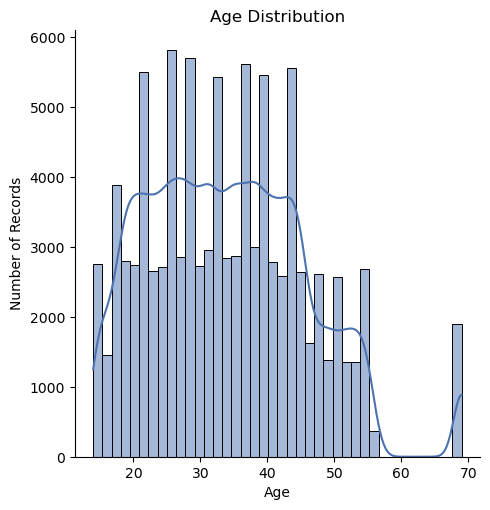

In [37]:
column_name = 'Age'
group_by = 'Customer_ID'

get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=int)

# plot
plot_displot(df_clean,column_name,bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)
#outlier_iqr_fill(df_train, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=40)

In [38]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


### Annual Income
#### _ 제거
### iqr

In [39]:
df_clean.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9888
Age                             0
SSN                          5516
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14867
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11303
Delay_from_due_date             0
Num_of_Delayed_Payment       6948
Changed_Credit_Limit            0
Num_Credit_Inquiries         1941
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8954
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4441
Payment_Behaviour               0
Monthly_Balance              1194
Credit_Score                    0
dtype: int64

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18908

Distribution of column:

20867.67      16
36585.12      16
17273.83      16
95596.35      15
33029.66      15
              ..
60381.32_      1
46152.92_      1
18105.32_      1
73475.02_      1
13037701.0     1
Name: Annual_Income, Length: 18908, dtype: int64

_ are removed

Datatype of Annual_Income is changed to <class 'float'>

Annual_Income Distribution


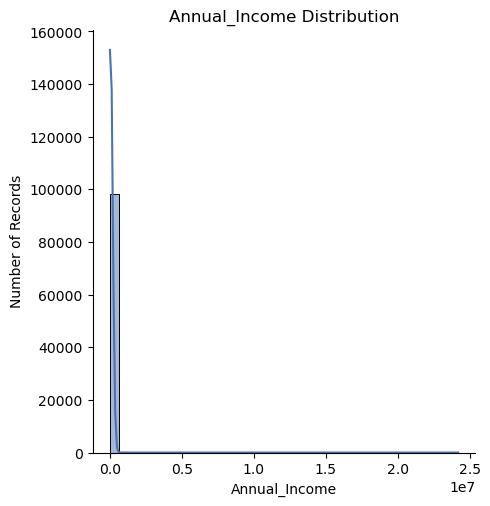


Annual_Income Distribution


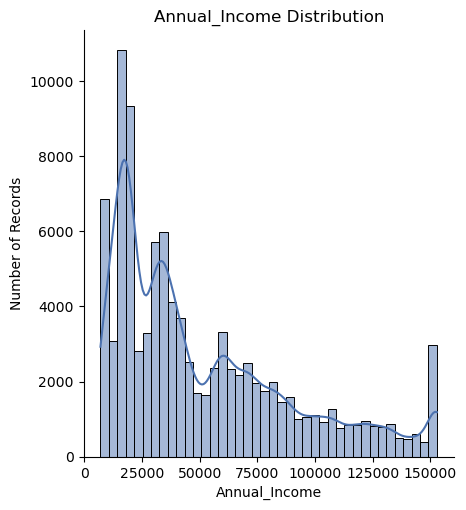

In [40]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'

get_column_details(df_clean,column_name)

# Clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=float)

plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [41]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [42]:
df_clean.shape

(99114, 28)

### Monthly Inhand Salary
#### null 값이 있습니다.
#### 월 소득 급여에 대한 이상치는 없었습니다.
#### 대부분의 고객은 월 소득이 낮습니다. 분포가 오른쪽으로 치우쳐 있습니다.

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  14867  null values

Number of Unique Values:  13231

Distribution of column:

6082.187500     15
6358.956667     15
6769.130000     15
2295.058333     15
3080.555000     14
                ..
1530.174167      1
1387.232104      1
454.382083       1
2846.477896      1
10823.060062     1
Name: Monthly_Inhand_Salary, Length: 13231, dtype: int64

Monthly_Inhand_Salary Distribution


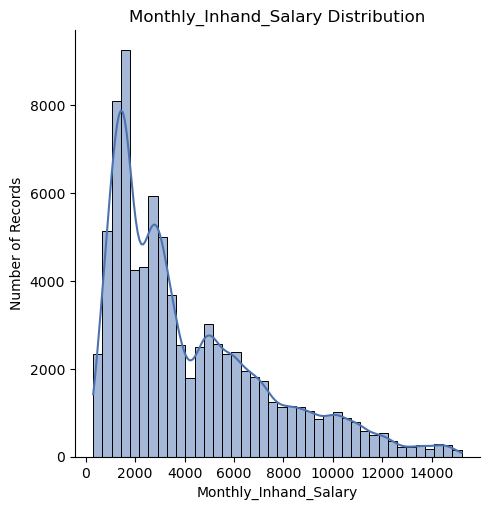


No. of missing values before filling with group median: 14867

No. of missing values after filling with group median: 0

Monthly_Inhand_Salary Distribution


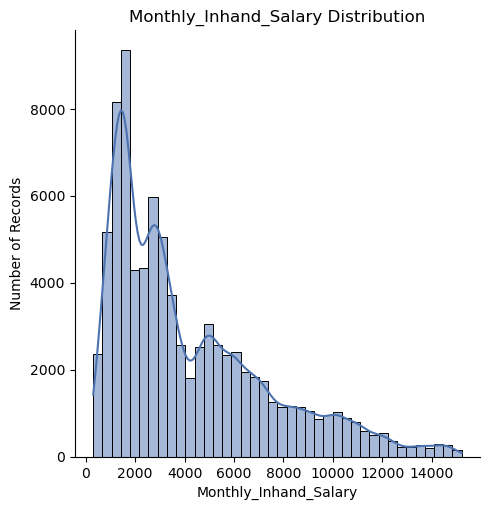

In [43]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

plot_displot(df_clean, column_name, bins=40)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_train, column_name, bins=40)

In [44]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [45]:
df_clean.shape

(99114, 28)

### Num Bank Accounts
#### 일부 이상치, 음수 값이 있습니다.
#### 정리 후 이 필드에는 11개의 가능한 값이 있습니다. Num Bank Accounts 범위는 0에서 10입니다.
#### 대부분의 고객은 그렇지 않습니다. 3에서 8 사이의 은행 계좌

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  941

Distribution of column:

6       12889
7       12704
8       12660
4       12085
5       12011
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 941, dtype: int64

Num_Bank_Accounts Distribution


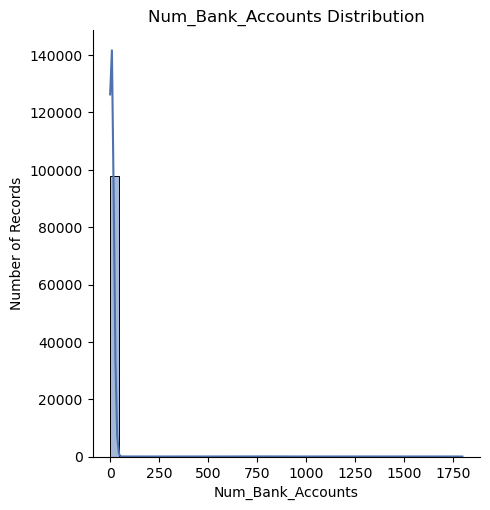


-----------------------------------------------------

There are  21  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_Bank_Accounts Distribution


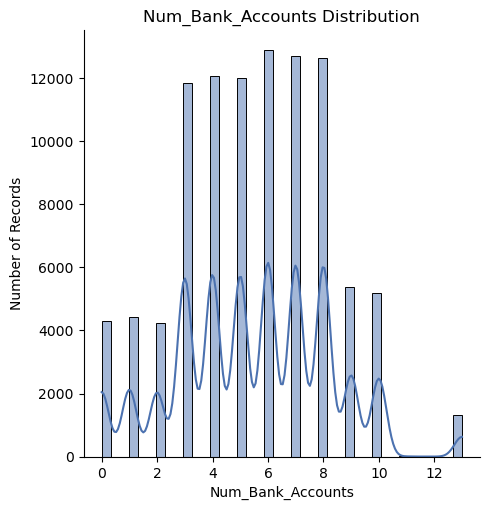

In [46]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean, column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [47]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [48]:
df_clean.shape

(99093, 28)

### Num Credit Cards
#### 신용 카드 번호의 고유 값이 1179개이므로 필드에 이상값이 있습니다.
#### 이상값을 제거한 후 신용 카드 수는 0에서 11까지이며 대부분의 고객은 3에서 7 범위의 신용 카드를 가지고 있으며 피크는 5입니다.

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1175

Distribution of column:

5      18279
7      16469
6      16418
4      13905
3      13145
       ...  
374        1
440        1
248        1
791        1
679        1
Name: Num_Credit_Card, Length: 1175, dtype: int64

Num_Credit_Card Distribution


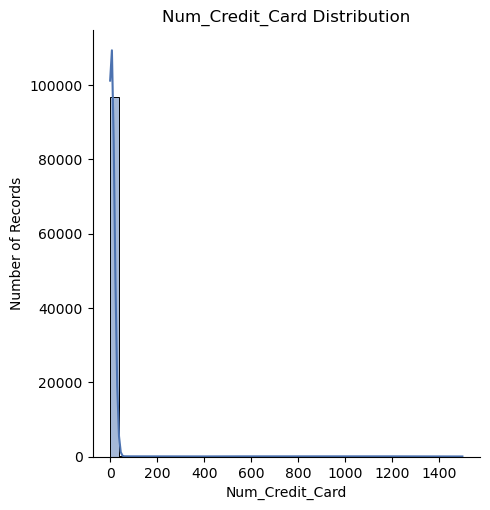


Num_Credit_Card Distribution


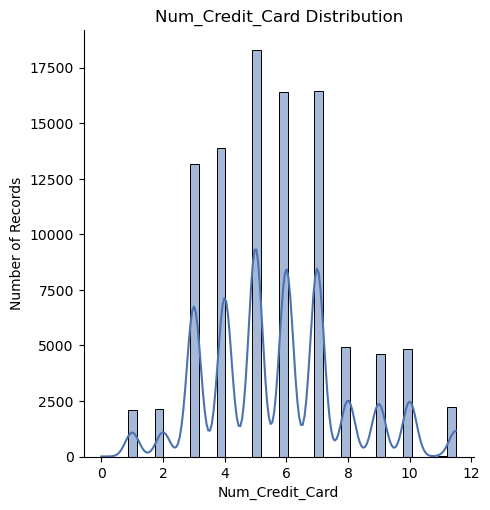

In [49]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [50]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [51]:
df_clean.shape

(99093, 28)

### Interest Rate
#### 특이치 존재, 정리 후 금리 범위 1% ~ 34%

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1731

Distribution of column:

8       4972
5       4920
6       4679
12      4504
10      4500
        ... 
3617       1
2147       1
4995       1
1899       1
5729       1
Name: Interest_Rate, Length: 1731, dtype: int64

Interest_Rate Distribution


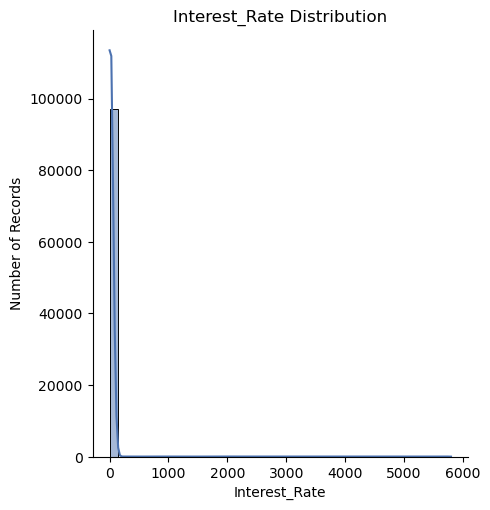


Interest_Rate Distribution


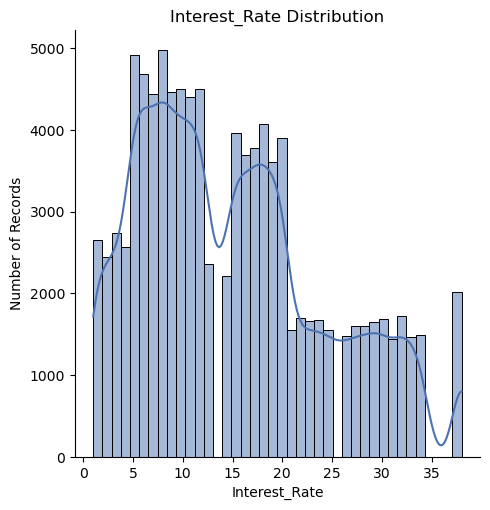

In [52]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [53]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good


In [54]:
df_clean.shape

(99093, 28)

### Delay from Due Date
#### 납기일로부터의 지연은 0일에서 30일 사이에 집중되어 있습니다.

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 15    3567
 13    3392
 8     3295
 14    3284
 10    3249
       ... 
-4       61
 65      55
-5       33
 66      31
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

Delay_from_due_date Distribution


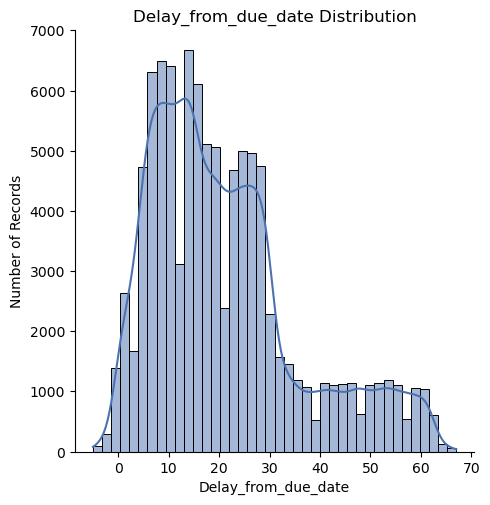


Delay_from_due_date Distribution


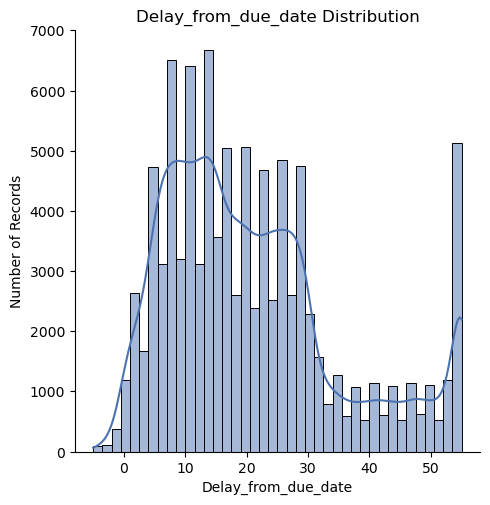

In [55]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [56]:
df_clean.shape

(99093, 28)

### Number of Delayed Payment

Details of Num_of_Delayed_Payment column

DataType:  object

There are  6948  null values

Number of Unique Values:  740

Distribution of column:

19      5269
17      5223
16      5126
10      5109
18      5031
        ... 
3489       1
749        1
1164       1
2616       1
2047       1
Name: Num_of_Delayed_Payment, Length: 740, dtype: int64

_ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Num_of_Delayed_Payment Distribution


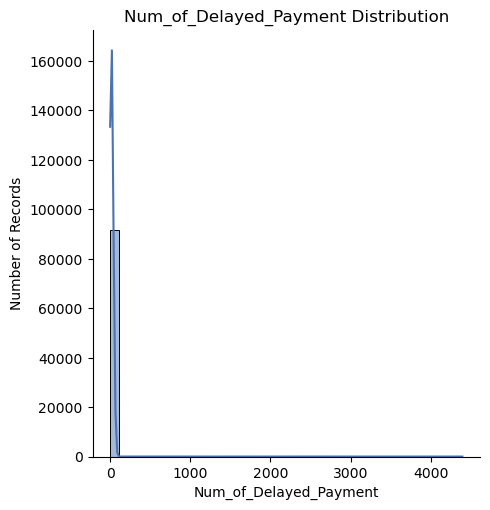


-----------------------------------------------------

There are  651  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Delayed_Payment Distribution


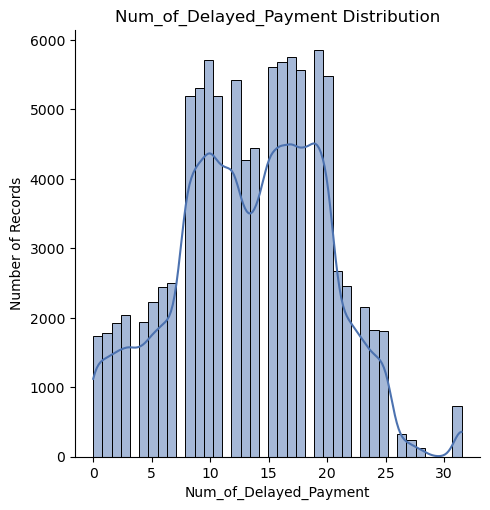

In [57]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float')

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# maximum
# *** null값 처리***

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean =remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [58]:
df_clean.shape

(98442, 28)

### Changed Credit Limit

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4377

Distribution of column:

_        2053
8.22      133
11.5      124
11.32     123
10.06     121
         ... 
26.38       1
-0.2        1
30.45       1
35.83       1
21.17       1
Name: Changed_Credit_Limit, Length: 4377, dtype: int64

Garbage value _ is replaced with np.nan

_ are removed

Datatype of Changed_Credit_Limit is changed to float

Changed_Credit_Limit Distribution


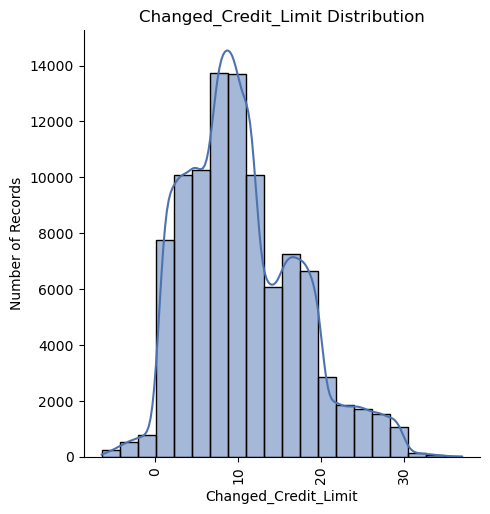


Changed_Credit_Limit Distribution


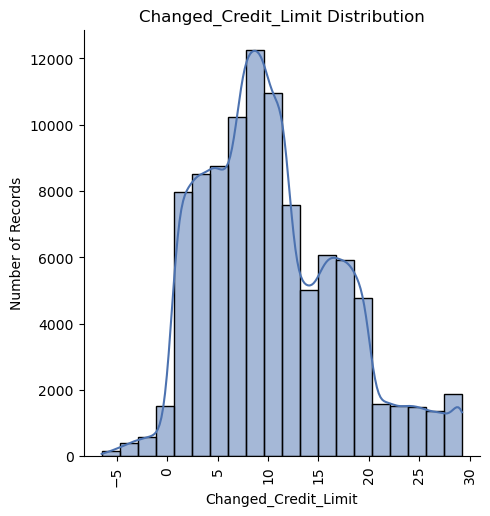

In [59]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

# 마이너스 냅두기

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float', replace_value='_')

plot_displot(df_clean, column_name,rotation=90)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name,rotation=90)

### Number of Credit Inquiries

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1927  null values

Number of Unique Values:  1209

Distribution of column:

4.0       11053
3.0        8700
6.0        8004
7.0        7975
2.0        7829
          ...  
470.0         1
1662.0        1
1312.0        1
154.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1209, dtype: int64

Num_Credit_Inquiries Distribution


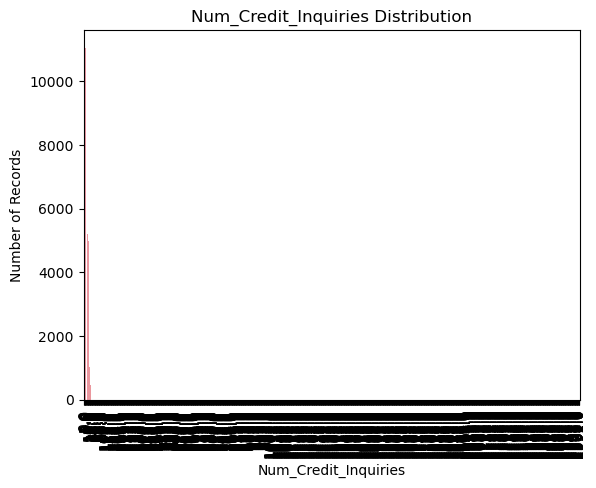


No. of missing values before filling with group median: 1927

No. of missing values after filling with group median: 0

Num_Credit_Inquiries Distribution


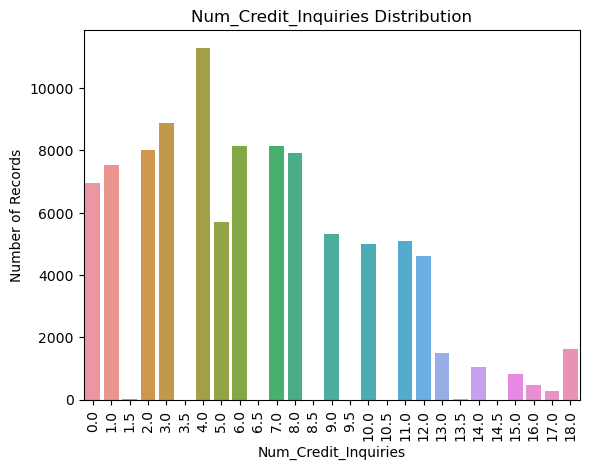

In [60]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

### Outstanding Debt

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13169

Distribution of column:

1360.45     23
1109.03     21
460.46      21
1151.7      18
1259.92     16
            ..
373.74_      1
605.35_      1
1319.74_     1
1566.55_     1
23.64_       1
Name: Outstanding_Debt, Length: 13169, dtype: int64

_ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Outstanding_Debt Distribution


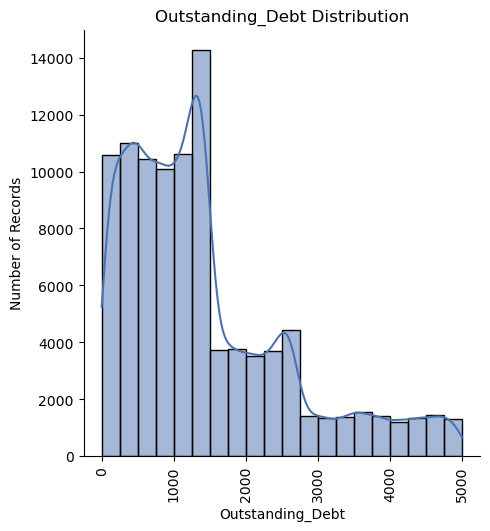


Outstanding_Debt Distribution


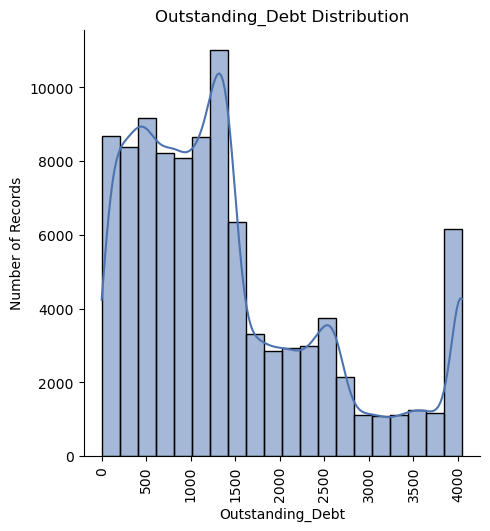

In [61]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

plot_displot(df_clean,column_name,rotation=90)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name,rotation=90)

### Credit Utilization Ratio
#### No cleaning is required

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

Credit_Utilization_Ratio Distribution


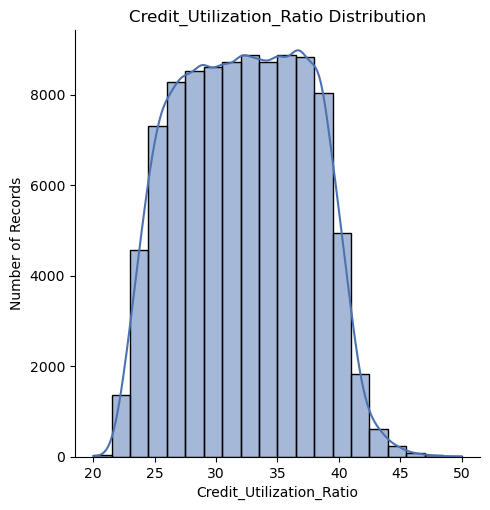


Credit_Utilization_Ratio Distribution


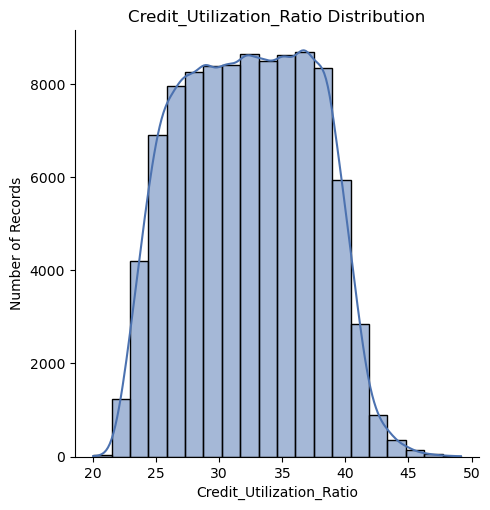

In [62]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

plot_displot(df_clean,column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)

### Credit History Age

Details of Credit_History_Age column

DataType:  object

There are  8901  null values

Number of Unique Values:  404

Distribution of column:

15 Years and 11 Months    443
19 Years and 5 Months     440
17 Years and 11 Months    438
19 Years and 4 Months     437
19 Years and 3 Months     435
                         ... 
0 Years and 3 Months       20
33 Years and 7 Months      14
0 Years and 2 Months       14
33 Years and 8 Months      11
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

Datatype of Credit_History_Age is changed to <class 'float'>

No. of missing values before filling with group median: 8901

No. of missing values after filling with group median: 0

Credit_History_Age Distribution


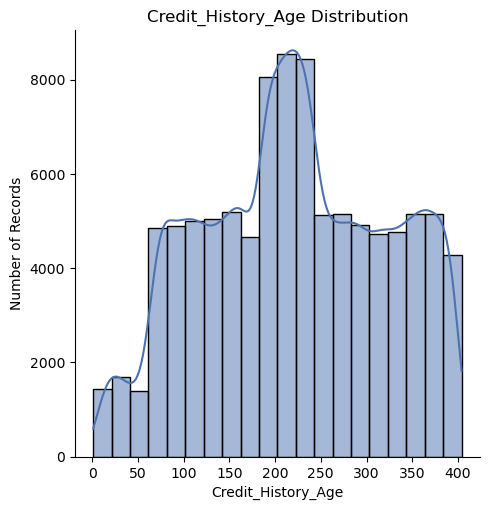

In [63]:
column_name = 'Credit_History_Age' # nan nan : lower, upper
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

df_clean = Month_Converter(df_clean, column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,datatype=float)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)


### Total EMI per month

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14896

Distribution of column:

0.000000        10380
269.239040          8
52.071931           8
87.877958           8
88.455404           8
                ...  
27537.000000        1
39568.000000        1
30861.000000        1
3951.000000         1
58638.000000        1
Name: Total_EMI_per_month, Length: 14896, dtype: int64

Total_EMI_per_month Distribution


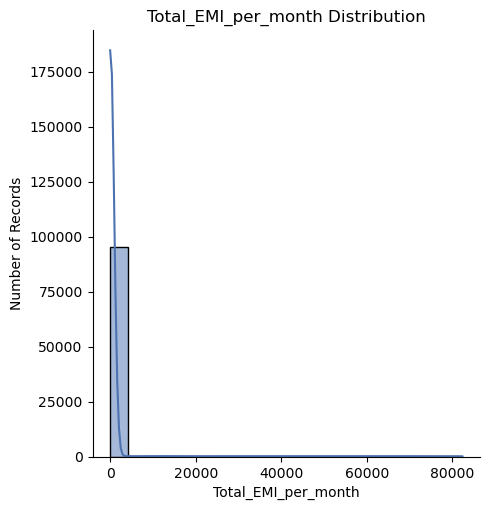


Total_EMI_per_month Distribution


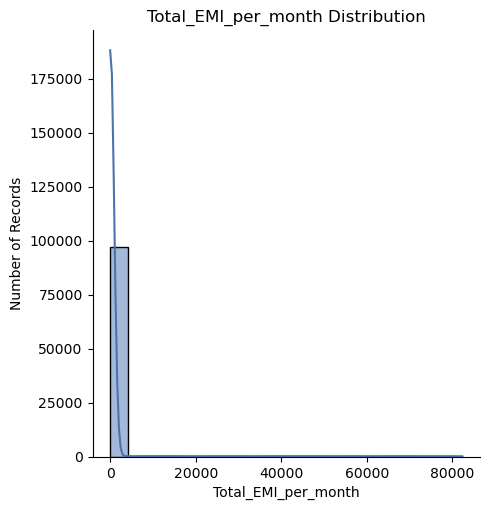

In [64]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_displot(df_clean, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

plot_displot(df_train, column_name)

### Amount Invested Monthly

Details of Amount_invested_monthly column

DataType:  object

There are  4414  null values

Number of Unique Values:  89631

Distribution of column:

__10000__             4231
0.0                    168
80.41529543900253        1
524.1437156214164        1
14.95420738488744        1
                      ... 
260.62680852362257       1
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 89631, dtype: int64

_ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Amount_invested_monthly Distribution


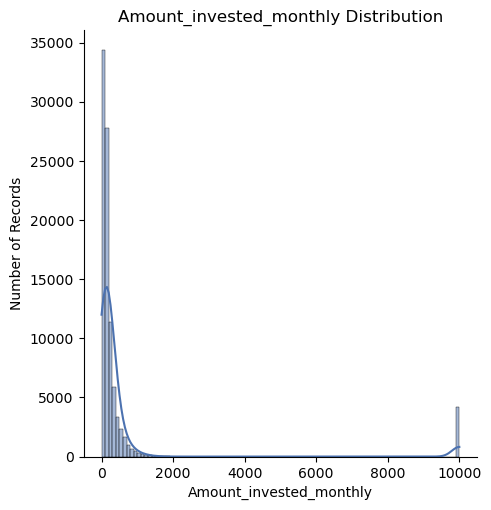


No. of missing values before filling with group median: 4414

No. of missing values after filling with group median: 0

Amount_invested_monthly Distribution


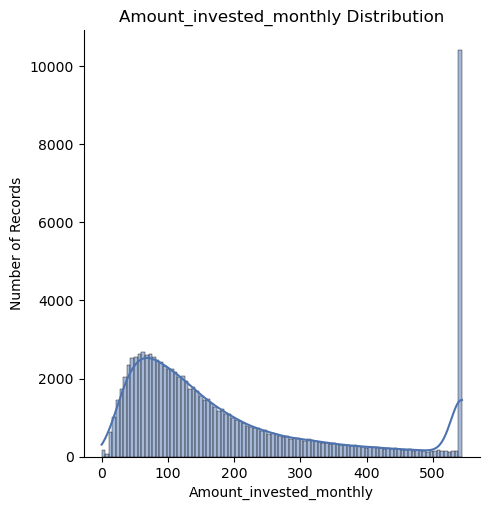

In [65]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_clean, column_name, bins= 100)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=100)

### Monthly Balance

Details of Monthly_Balance column

DataType:  object

There are  1187  null values

Number of Unique Values:  97247

Distribution of column:

__-333333333333333333333333333__    9
312.49408867943663                  1
278.0963789943155                   1
236.2228044674426                   1
366.40070862669137                  1
                                   ..
339.2717883364888                   1
280.68623167356344                  1
366.2890379762706                   1
151.1882696261166                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 97247, dtype: int64

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Datatype of Monthly_Balance is changed to <class 'float'>

Monthly_Balance Distribution


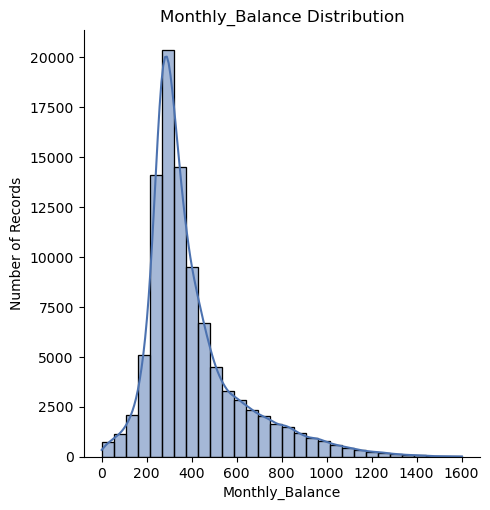


No. of missing values before filling with group median: 1196

No. of missing values after filling with group median: 0

Monthly_Balance Distribution


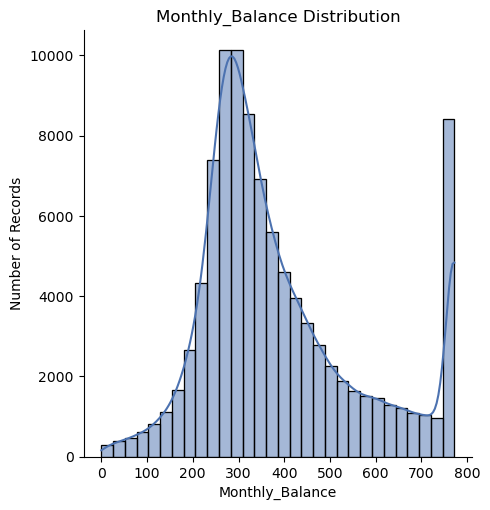

In [66]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

#Cleaning
df_clean[column_name] = df_clean[column_name].replace('',np.nan)
df_clean = clean_numerical_field(df_clean, column_name, datatype=float, replace_value = '__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_clean,column_name, bins=30)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=30)


### Number of Loan

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  426

Distribution of column:

3        14112
2        14004
4        13811
0        10154
1         9877
         ...  
745          1
1320_        1
103          1
1444         1
966          1
Name: Num_of_Loan, Length: 426, dtype: int64

_ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Num_of_Loan Distribution


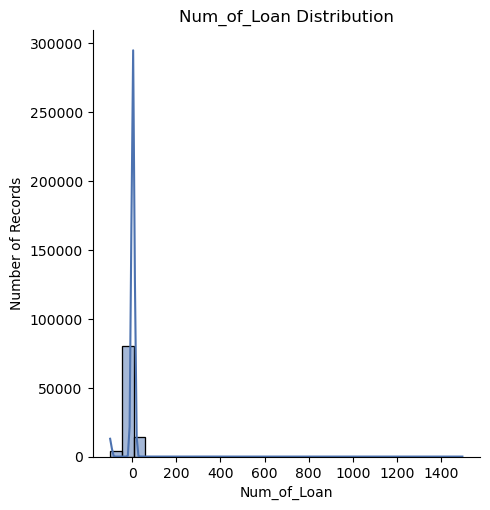


-----------------------------------------------------

There are  3812  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Loan Distribution


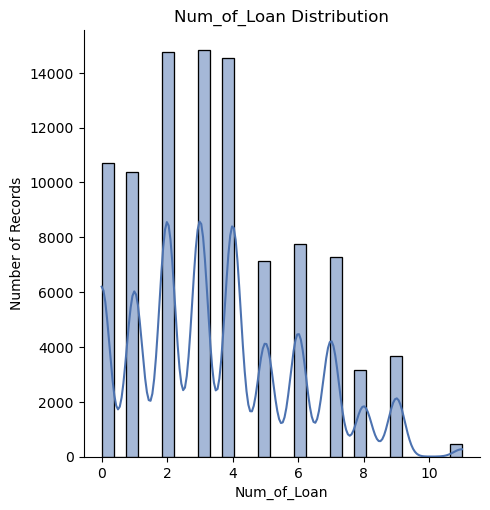

In [67]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

# plot
plot_displot(df_clean,column_name,bins=30)

# iqr
df_clean = outlier_iqr_fill(df_clean, group_by, column_name)
#outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=30)

# 최종

In [68]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,269.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [69]:
df_clean.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9457
Age                             0
SSN                          5257
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10754
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [70]:
# df_clean.to_csv('C:\\Users\\User\\Desktop\\팀플\\train_outlier_fill.csv')

## 최종최종 (Outlier 대체 / 'NM' x / Credit_Mix 3)

### 모든 컬럼 살아있음

In [71]:
# ['Payment_of_Min_Amount'] 'NM' => 'No'

print(df_clean['Payment_of_Min_Amount'].unique())
df_clean['Payment_of_Min_Amount'] = df_clean['Payment_of_Min_Amount'].replace('NM', 'No')
print(df_clean['Payment_of_Min_Amount'].unique())

['No' 'NM' 'Yes']
['No' 'Yes']


In [72]:
# [Credit_Mix] '_' => drop

print(df_clean['Credit_Mix'].value_counts(dropna=False))
print(df_clean.shape)
df_clean['Credit_Mix'] = df_clean['Credit_Mix'].replace('_', np.nan)
df_clean.dropna(subset=['Credit_Mix'], inplace=True)
print(df_clean['Credit_Mix'].value_counts(dropna=False))
print(df_clean.shape)

Standard    34764
Good        22636
_           19142
Bad         18088
Name: Credit_Mix, dtype: int64
(94630, 28)
Standard    34764
Good        22636
Bad         18088
Name: Credit_Mix, dtype: int64
(75488, 28)


In [73]:
print(df_clean.info())
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75488 entries, 1 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        75488 non-null  object 
 1   Customer_ID               75488 non-null  object 
 2   Month                     75488 non-null  int64  
 3   Name                      67941 non-null  object 
 4   Age                       75488 non-null  float64
 5   SSN                       71277 non-null  object 
 6   Occupation                75488 non-null  object 
 7   Annual_Income             75488 non-null  float64
 8   Monthly_Inhand_Salary     75488 non-null  float64
 9   Num_Bank_Accounts         75488 non-null  float64
 10  Num_Credit_Card           75488 non-null  float64
 11  Interest_Rate             75488 non-null  float64
 12  Num_of_Loan               75488 non-null  float64
 13  Type_of_Loan              67033 non-null  object 
 14  Delay_

In [74]:
df_clean.to_csv('C:\\Users\\User\\Desktop\\팀플\\train_outlier_fill_1.csv')

### 필요없는 컬럼 제거 & 라벨인코딩

In [75]:
# Drop columns
print("Size of Dataset before dropping columns : ",df_clean.shape)
drop_columns = ['ID','Customer_ID','Name','SSN', 'Type_of_Loan']
df_clean.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_clean.shape)

Size of Dataset before dropping columns :  (75488, 28)
Size of Dataset after dropping columns :  (75488, 23)


In [76]:
df_clean['Credit_Score'].value_counts()

Standard    40250
Poor        21997
Good        13241
Name: Credit_Score, dtype: int64

In [77]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

In [78]:
df_clean['Credit_Score'].value_counts()

2    40250
1    21997
0    13241
Name: Credit_Score, dtype: int64

In [79]:
print(df_clean.shape)
print(df_clean.info())
print(df_clean.isnull().sum())

(75488, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75488 entries, 1 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     75488 non-null  int64  
 1   Age                       75488 non-null  float64
 2   Occupation                75488 non-null  int32  
 3   Annual_Income             75488 non-null  float64
 4   Monthly_Inhand_Salary     75488 non-null  float64
 5   Num_Bank_Accounts         75488 non-null  float64
 6   Num_Credit_Card           75488 non-null  float64
 7   Interest_Rate             75488 non-null  float64
 8   Num_of_Loan               75488 non-null  float64
 9   Delay_from_due_date       75488 non-null  float64
 10  Num_of_Delayed_Payment    75488 non-null  float64
 11  Changed_Credit_Limit      75488 non-null  float64
 12  Num_Credit_Inquiries      75488 non-null  float64
 13  Credit_Mix                75488 non-null  int32  

In [80]:
df_clean.to_csv('C:\\Users\\User\\Desktop\\팀플\\train_outlier_fill_2.csv')